In [252]:
reset -f

In [253]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [254]:
xyz = xr.open_dataset('/Users/sumanmaity/Temp/RF25_ind2022_rfp25.nc')

In [293]:
# Calculating total JJAS rainfall
# 1st method
print(xyz['RAINFALL'].sel(TIME=slice('2022-06','2022-09')).mean()*122)
# 2nd method
print(xyz['RAINFALL'].sel(TIME=slice('2022-06','2022-09')).mean(['LATITUDE','LONGITUDE']).sum('TIME'))

<xarray.DataArray 'RAINFALL' ()>
array(919.9381366)
<xarray.DataArray 'RAINFALL' ()>
array(919.9381366)


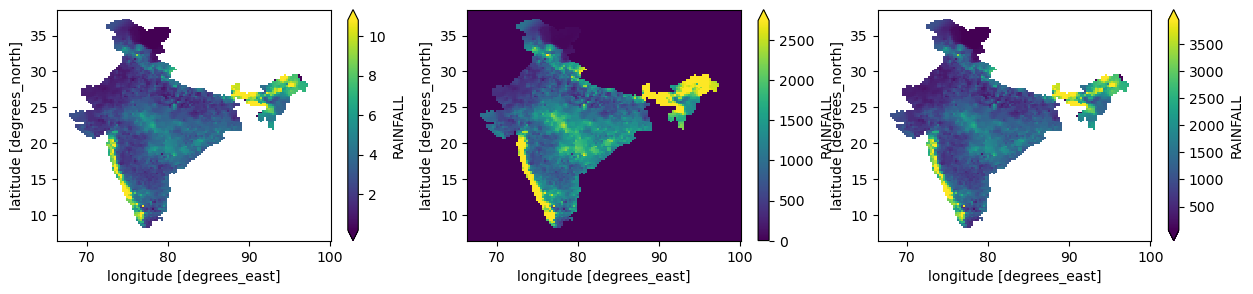

In [280]:
# For a grid having all NaN values, sum will be 0 if min_count=0 (default);
# if you set min_count=1, then the sum will be NaN, which is expected.
# but this is not true for mean
#
fig,ax = plt.subplots(1,3,figsize=(15,3))
#
xyz['RAINFALL'].mean('TIME').plot(ax=ax[0],robust=True)
#
xyz['RAINFALL'].sum('TIME').plot(ax=ax[1],robust=True)
#
xyz['RAINFALL'].sum('TIME',min_count=1).plot(ax=ax[2],robust=True)

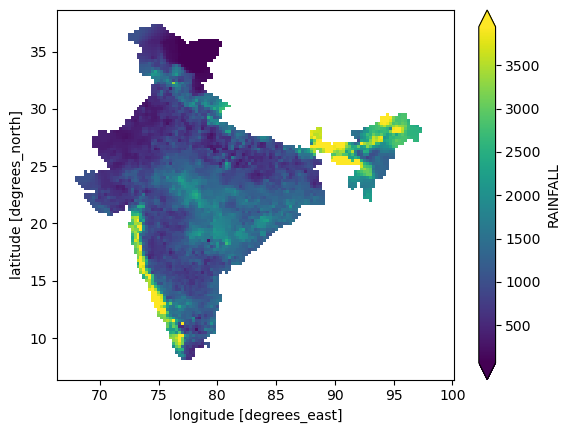

In [298]:
# This can also be done in this way
#
abc = xyz['RAINFALL'].sum('TIME')
abc = abc.where(abc != 0)
abc.plot(robust=True)

Text(0.5, 1.0, 'Annual total rainfall (mm) in 2022')

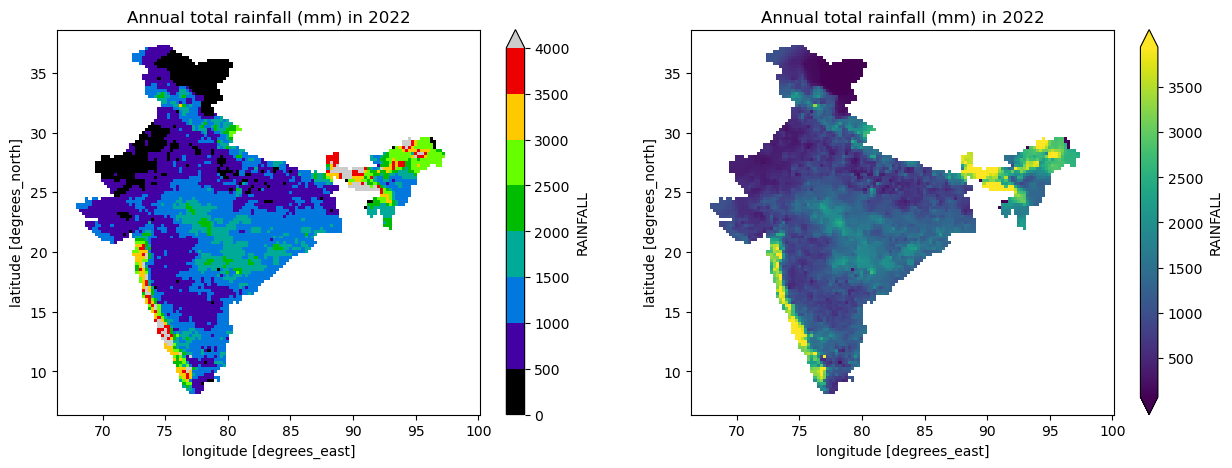

In [287]:
# Annual total rainfall (mm) spatial plot
fig,ax = plt.subplots(1,2,figsize=(15,5))
xyz['RAINFALL'].sum('TIME',min_count=1).plot(ax = ax[0],cmap=plt.cm.nipy_spectral,robust=True,levels=10)
ax[0].set_title('Annual total rainfall (mm) in 2022')
xyz['RAINFALL'].sum('TIME',min_count=1).plot(ax = ax[1],robust=True)
ax[1].set_title('Annual total rainfall (mm) in 2022')

Text(0.5, 1.0, 'JJAS total rainfall (mm) in 2022')

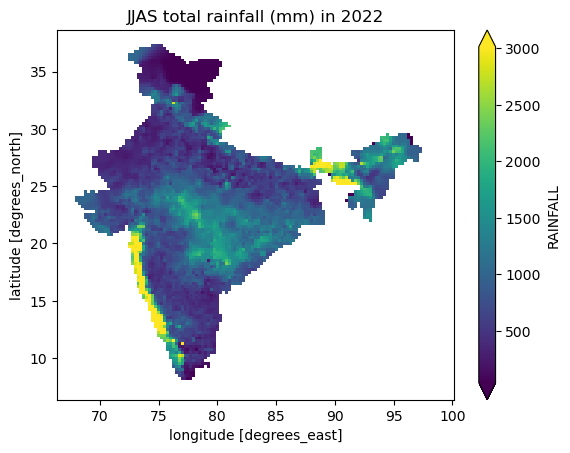

In [288]:
# Total rainfall (mm) spatial plot in JJAS
xyz['RAINFALL'].sel(TIME=slice('2022-06','2022-09')).sum('TIME',min_count=1).plot(robust=True)
plt.title('JJAS total rainfall (mm) in 2022')

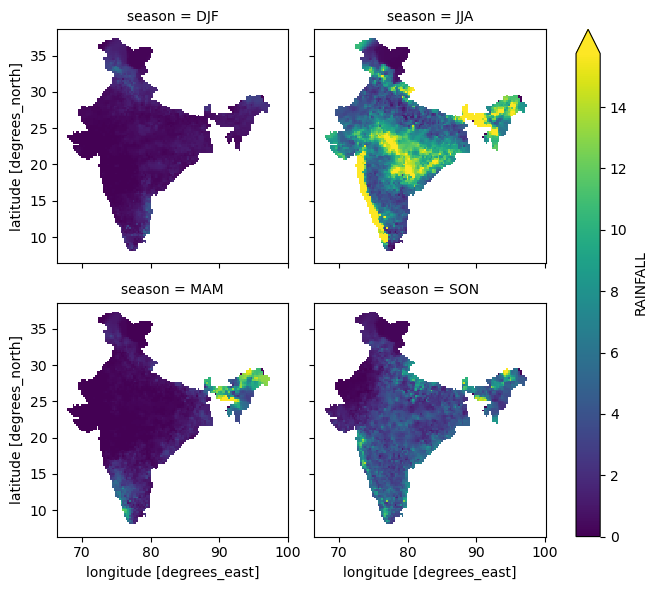

In [269]:
# mean seasonal rainfall (mm/day) spatial plot
xyz_season = xyz['RAINFALL'].groupby('TIME.season').mean('TIME')
xyz_season.plot(x='LONGITUDE',y='LATITUDE',col='season',col_wrap=2,robust=True)